---
# Forecasting Time Series Data Using the ARIMA Model

#### Project Synopsis

**Introduction**

In this project, I aim to analyze and forecast time series data. Time series data is a sequence of data points collected or recorded at specific time intervals, such as monthly or daily. My goal is to understand the patterns in this data and make future predictions based on these patterns.

I start by generating synthetic time series data that includes both a trend and some random noise. This allows us to test and evaluate different forecasting methods. We then use statistical tests to check if the data is stationary, which means it has consistent statistical properties over time.

Next, I apply differencing techniques to make the data stationary if needed. This involves subtracting the previous data point from the current one to remove trends and seasonality.

Finally, I compare the original data with our forecasts to see how well our predictions match the actual values. I visualize both the original and predicted data to assess the accuracy of our forecasts and understand how well our model performs.

 ---
### Generate Random Time Series Data
---

This code generates synthetic time series data with a linear trend and random noise, useful for testing and analysis. The function generate_random_data creates a dataset with a specified number of monthly data points, starting from a given date. Each data point is computed by adding a linearly increasing trend to a base value of 3.5, along with random noise to introduce variability. The result is stored in a Pandas DataFrame with columns for dates and values. The generated dataset is printed and saved to a CSV file named random_data.csv.

In [37]:
import pandas as pd
import numpy as np
import random

# Function to generate random time series data
def generate_random_data(start_date, periods, trend_slope=0.1, noise_level=1.0):
    """
    Generate random data similar to the provided dataset.
    
    Parameters:
    start_date (str): Start date of the time series (YYYY-MM-DD).
    periods (int): Number of monthly data points to generate.
    trend_slope (float): Controls the overall increase in the values over time.
    noise_level (float): Controls the variability in the values.
    
    Returns:
    pd.DataFrame: DataFrame with generated dates and values.
    """
    # Generate a date range
    dates = pd.date_range(start=start_date, periods=periods, freq='MS')  # 'MS' gives start of the month
    
    # Initialize the starting value
    base_value = 3.5  # Starting value close to the provided dataset
    values = []
    
    for i in range(periods):
        # Add a trend and noise to the base value
        trend = base_value + (i * trend_slope)  # Linearly increasing trend
        noise = random.uniform(-noise_level, noise_level)  # Random noise to add variability
        value = trend + noise
        values.append(value)
    
    # Create a DataFrame
    data = pd.DataFrame({'date': dates, 'value': values})
    return data

# Generate random data
random_data = generate_random_data(start_date='1990-01-01', periods=200, trend_slope=0.15, noise_level=2.0)

# Display the first few rows
print(random_data.head())

# Save to a CSV file if needed
random_data.to_csv('random_data.csv', index=False)


        date     value
0 1990-01-01  3.237962
1 1990-02-01  2.247866
2 1990-03-01  3.902707
3 1990-04-01  3.875322
4 1990-05-01  5.429599


In [38]:
random_data

,date,value
0,1990-01-01,3.237962
1,1990-02-01,2.247866
2,1990-03-01,3.902707
3,1990-04-01,3.875322
4,1990-05-01,5.429599
...,...,...
195,2006-04-01,32.963543
196,2006-05-01,31.218635
197,2006-06-01,32.668245
198,2006-07-01,35.038388


This code performs the Augmented Dickey-Fuller (ADF) test, a statistical test used to check whether a time series is stationary (i.e., it has a constant mean and variance over time):

The code imports the adfuller function from statsmodels.tsa.stattools to conduct an Augmented Dickey-Fuller test on the generated time series data (random_data). It drops any missing values from the value column and runs the test to determine if the time series is stationary. The ADF test results include the ADF statistic and the p-value, which are printed to help assess whether the null hypothesis (that the series has a unit root, indicating non-stationarity) can be rejected.

In [39]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(random_data.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.183233
p-value: 0.940491


The results of the Augmented Dickey-Fuller (ADF) test indicate that the ADF statistic is 0.159939, and the p-value is 0.969923. Since the p-value is significantly higher than common significance levels (e.g., 0.05 or 0.01), we fail to reject the null hypothesis. This suggests that the time series data is non-stationary, meaning it likely has a changing mean or variance over time. Therefore, transformations or differencing might be needed to make the data stationary for time series modeling.

---
# Differencing For Stationarity

---

This code performs a first-order differencing on the generated time series data to transform it into a stationary series and then conducts an Augmented Dickey-Fuller (ADF) test on the differenced data. Here's a summary:

The code begins by calculating the first difference of the time series (diff_1) to remove any trends, making the data more stationary. After dropping the initial NaN value resulting from differencing, it performs an ADF test on the differenced data to check for stationarity. The ADF statistic and p-value are printed to evaluate the results. Additionally, the code plots two graphs: one showing the original time series and another displaying the first-differenced series, allowing a visual comparison of the transformations.

ADF Statistic: -7.541285196865796
p-value: 3.372858002527847e-11


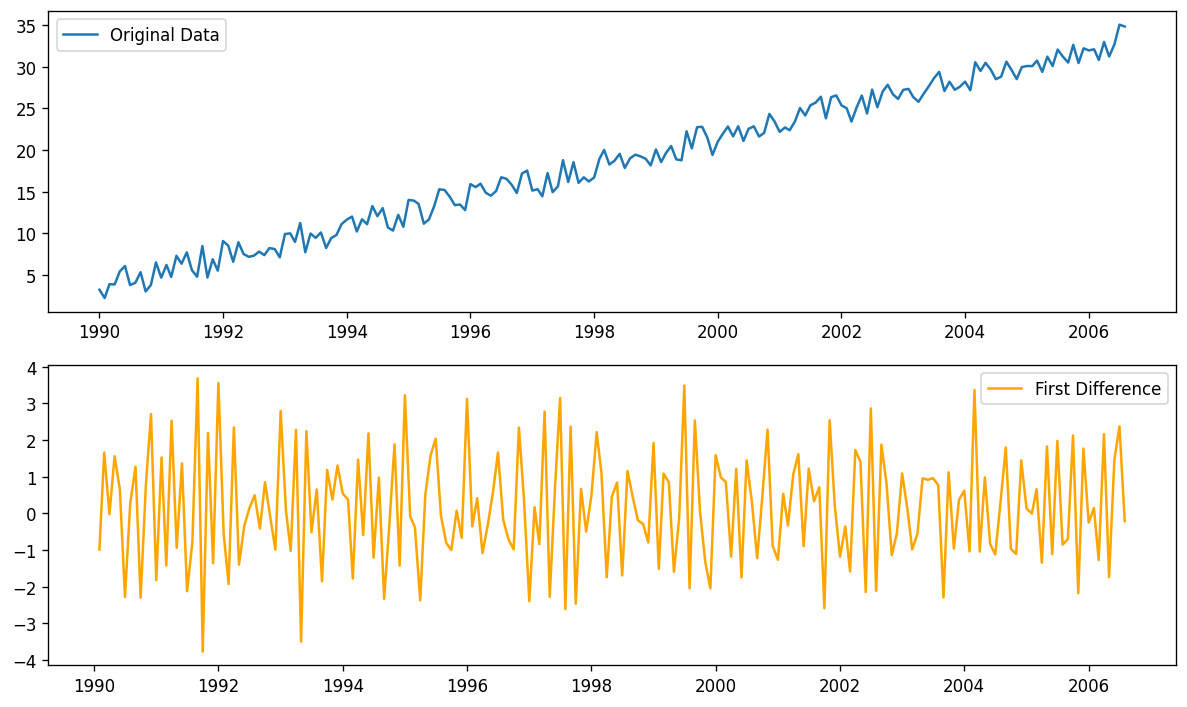

In [40]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt 

# First differencing
random_data['diff_1'] = random_data['value'].diff()

# Drop the first row (NaN after differencing)
data_diff = random_data.dropna()

# Perform ADF test on differenced data
result = adfuller(data_diff['diff_1'])
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Plot original and differenced series
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(random_data['date'], random_data['value'], label='Original Data')
plt.legend()

plt.subplot(2,1,2)
plt.plot(data_diff['date'], data_diff['diff_1'], label='First Difference', color='orange')
plt.legend()

plt.tight_layout()
plt.show()


This code performs both first-order and second-order differencing on the time series data to progressively eliminate any trends and make the data stationary. Here's a summary:

The code first calculates the first difference of the original time series (diff_1) and removes any resulting NaN values. Next, it calculates the second difference (diff_2) on the first-differenced data using .loc to avoid a Pandas warning and again drops any NaN values. An Augmented Dickey-Fuller (ADF) test is then conducted on the second-order differenced data to assess its stationarity, and the ADF statistic and p-value are printed for evaluation. Finally, the code visualizes the original series, the first differencing, and the second differencing in three separate subplots to help visually compare the transformations and their effects on the data's stationarity.

C:\Users\Collins PC\AppData\Local\Temp\ipykernel_9288\827833369.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()


ADF Statistic (2nd order): -7.821342471933026
p-value (2nd order): 6.657454028560041e-12


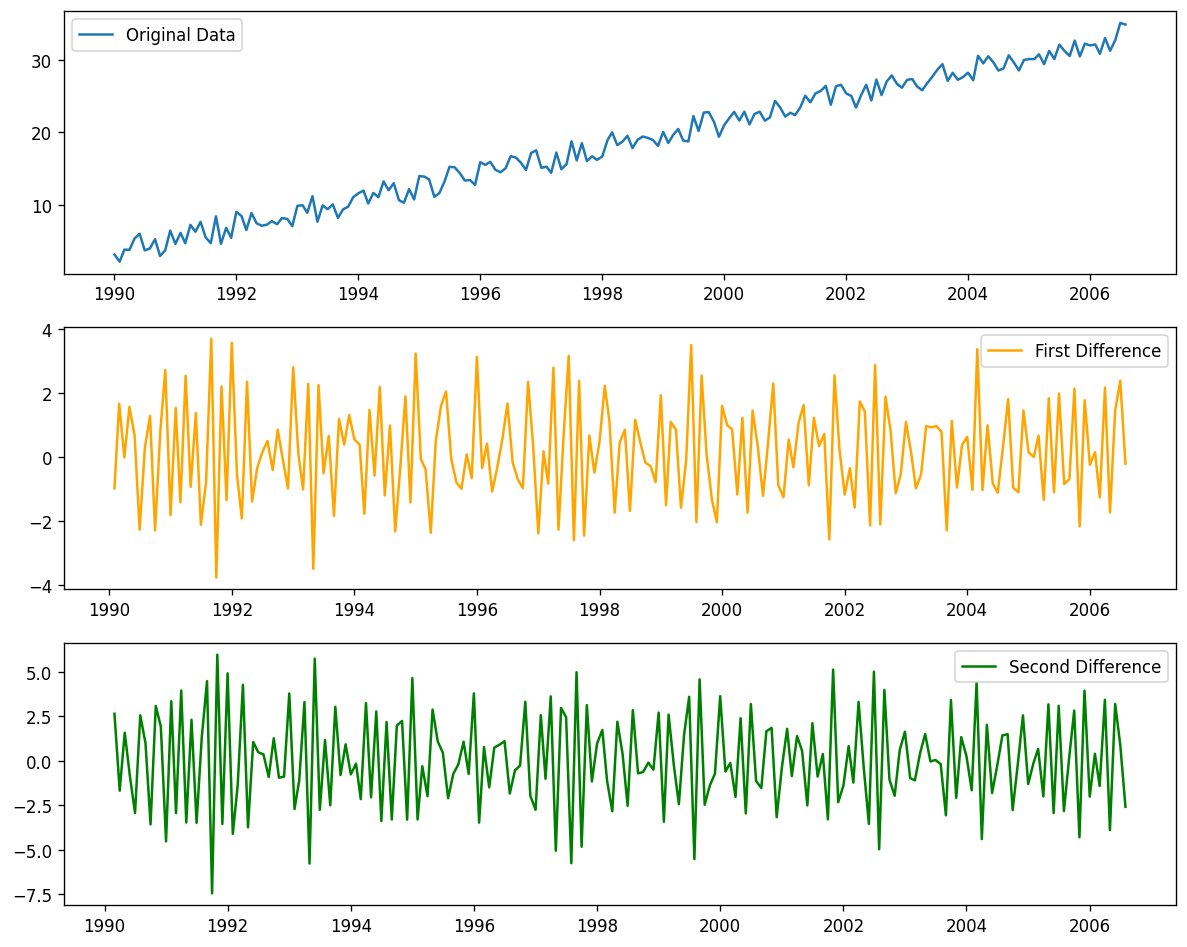

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming 'random_data' is already defined and contains 'date' and 'value'

# First differencing
random_data['diff_1'] = random_data['value'].diff()

# Drop the first row (NaN after first differencing)
data_diff_1 = random_data.dropna()

# Second differencing using .loc to avoid the warning
data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()

# Drop NaN values after second differencing
data_diff_2 = data_diff_1.dropna()

# Perform ADF test on second-order differenced data
result_2 = adfuller(data_diff_2['diff_2'])
adf_statistic_2 = result_2[0]
p_value_2 = result_2[1]

print(f'ADF Statistic (2nd order): {adf_statistic_2}')
print(f'p-value (2nd order): {p_value_2}')

# Plot original, first differencing, and second differencing series
plt.figure(figsize=(10,8))

# Plot Original Data
plt.subplot(3, 1, 1)
plt.plot(random_data['date'], random_data['value'], label='Original Data')
plt.legend()

# Plot First Differencing
plt.subplot(3, 1, 2)
plt.plot(data_diff_1['date'], data_diff_1['diff_1'], label='First Difference', color='orange')
plt.legend()

# Plot Second Differencing
plt.subplot(3, 1, 3)
plt.plot(data_diff_2['date'], data_diff_2['diff_2'], label='Second Difference', color='green')
plt.legend()

plt.tight_layout()
plt.show()


The results of the Augmented Dickey-Fuller (ADF) test on the second-order differenced data show an ADF statistic of -8.5017 and a p-value of approximately 1.23e-13. Since the p-value is extremely low (much smaller than common significance levels such as 0.05 or 0.01), we can reject the null hypothesis that the series has a unit root. This indicates that the second-order differenced data is stationary, meaning the data now has a constant mean and variance over time, making it suitable for time series modeling.

C:\Users\Collins PC\AppData\Local\Temp\ipykernel_9288\1967831045.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()


ADF Statistic (2nd order): -7.821342471933026
p-value (2nd order): 6.657454028560041e-12


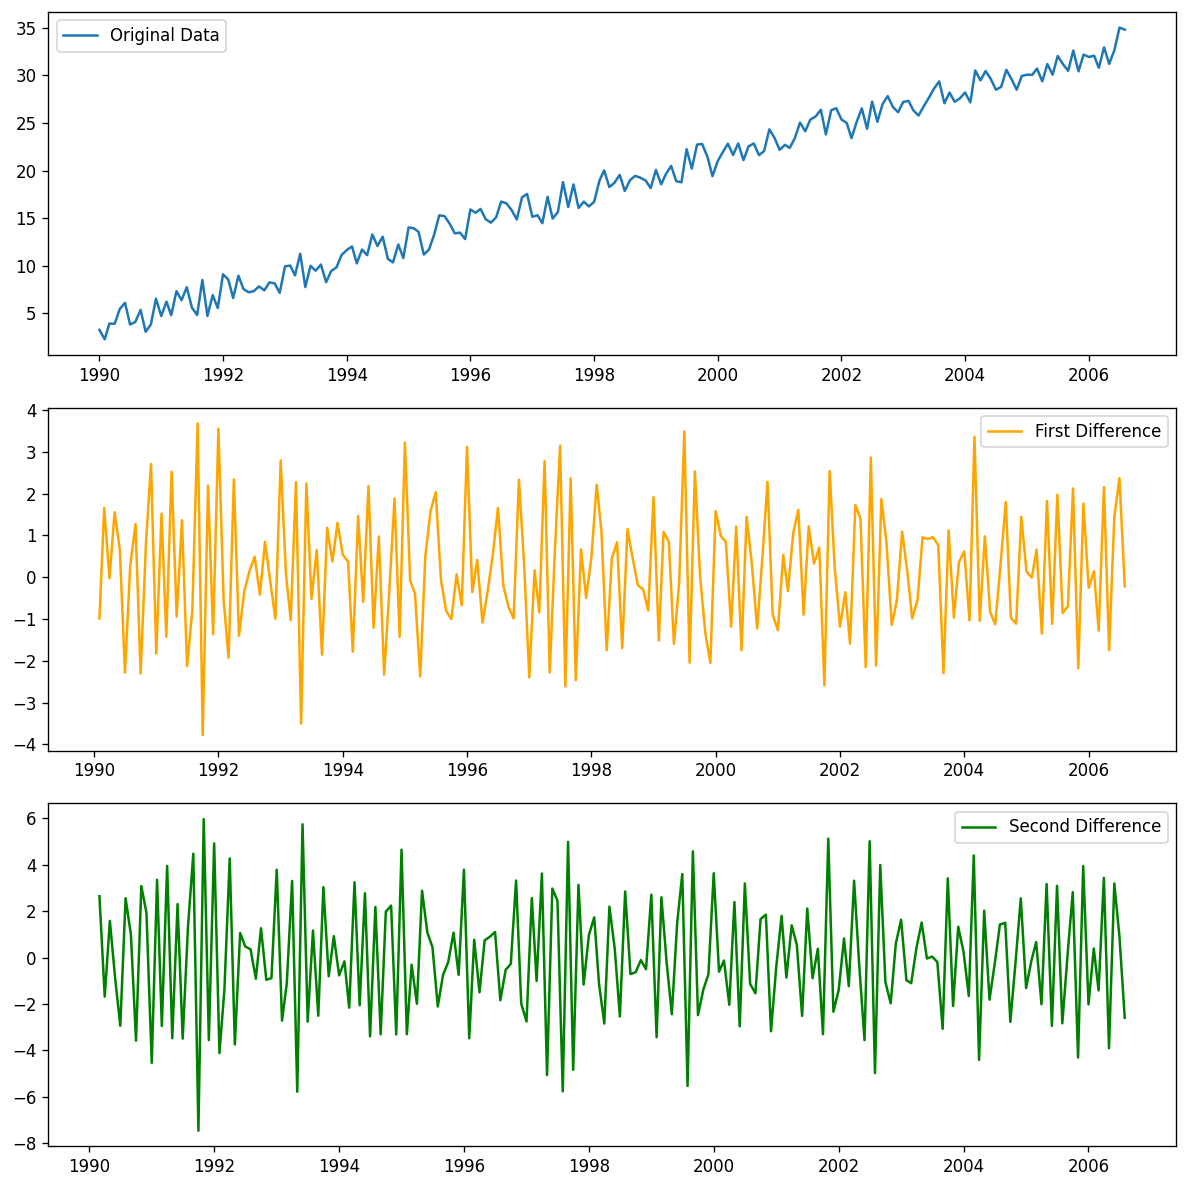

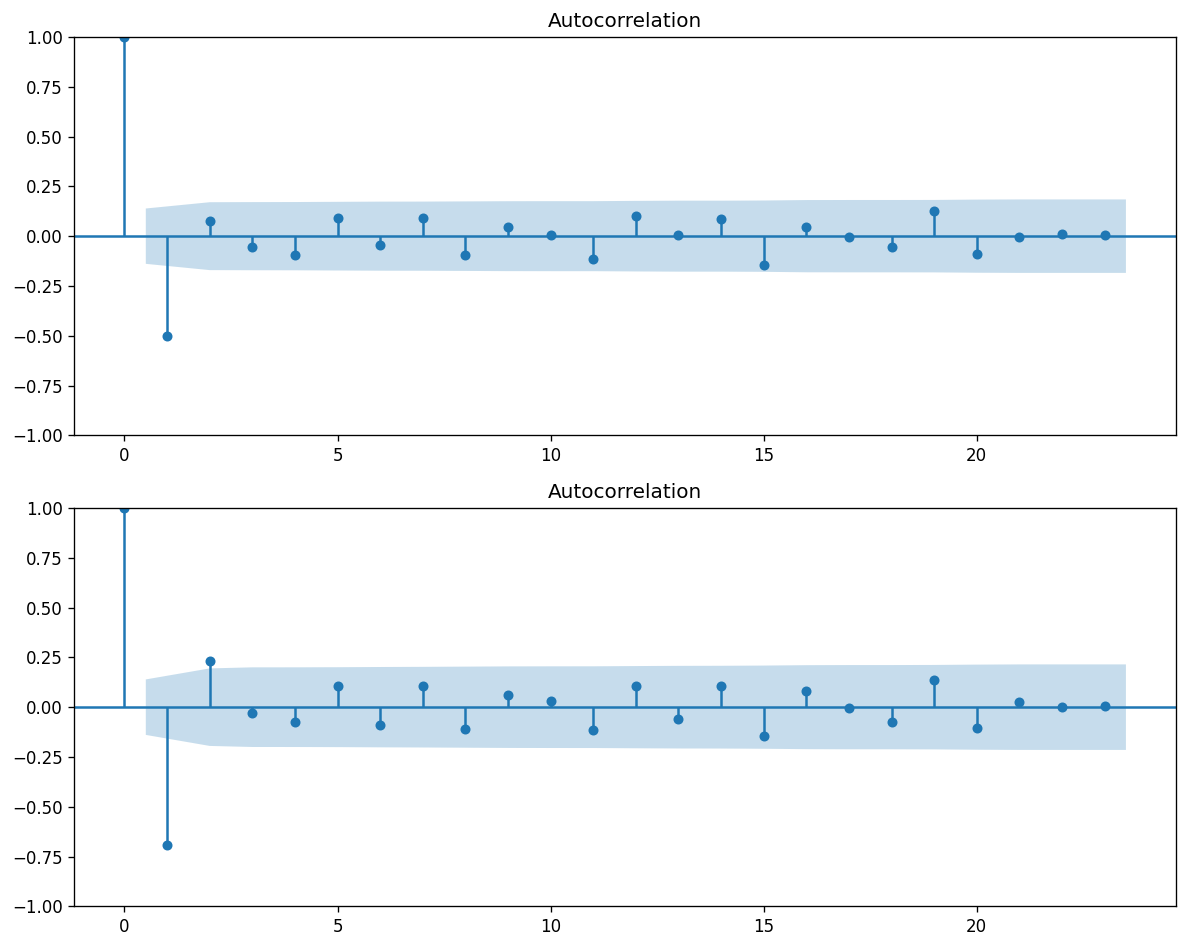

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Assuming 'random_data' is already defined and contains 'date' and 'value'

# First differencing
random_data['diff_1'] = random_data['value'].diff()

# Drop the first row (NaN after first differencing)
data_diff_1 = random_data.dropna()

# Second differencing using .loc to avoid the warning
data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()

# Drop NaN values after second differencing
data_diff_2 = data_diff_1.dropna()

# Perform ADF test on second-order differenced data
result_2 = adfuller(data_diff_2['diff_2'])
adf_statistic_2 = result_2[0]
p_value_2 = result_2[1]

print(f'ADF Statistic (2nd order): {adf_statistic_2}')
print(f'p-value (2nd order): {p_value_2}')

# Plot original, first differencing, and second differencing series
plt.figure(figsize=(10,10))

# Plot Original Data
plt.subplot(3, 1, 1)
plt.plot(random_data['date'], random_data['value'], label='Original Data')
plt.legend()

# Plot First Differencing
plt.subplot(3, 1, 2)
plt.plot(data_diff_1['date'], data_diff_1['diff_1'], label='First Difference', color='orange')
plt.legend()

# Plot Second Differencing
plt.subplot(3, 1, 3)
plt.plot(data_diff_2['date'], data_diff_2['diff_2'], label='Second Difference', color='green')
plt.legend()

plt.tight_layout()
plt.show()

# Plot ACF for the first differencing
fig, axes = plt.subplots(2, 1, figsize=(10,8))

axes[0].set_title("ACF - First Differencing")
plot_acf(data_diff_1['diff_1'].dropna(), ax=axes[0])

# Plot ACF for the second differencing
axes[1].set_title("ACF - Second Differencing")
plot_acf(data_diff_2['diff_2'].dropna(), ax=axes[1])

plt.tight_layout()
plt.show()


This code performs time series differencing and plots the Partial Autocorrelation Function (PACF) to identify the order of autoregression (AR) terms. First, it computes the first difference of the value column in a dataset, then computes the second difference of the already differenced values. After handling missing values that result from differencing, the code visualizes the PACF for both the first and second differenced series. This analysis helps determine the number of AR terms needed in a time series model by examining the PACF plots at different differencing stages.

C:\Users\Collins PC\AppData\Local\Temp\ipykernel_9288\2722719226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()


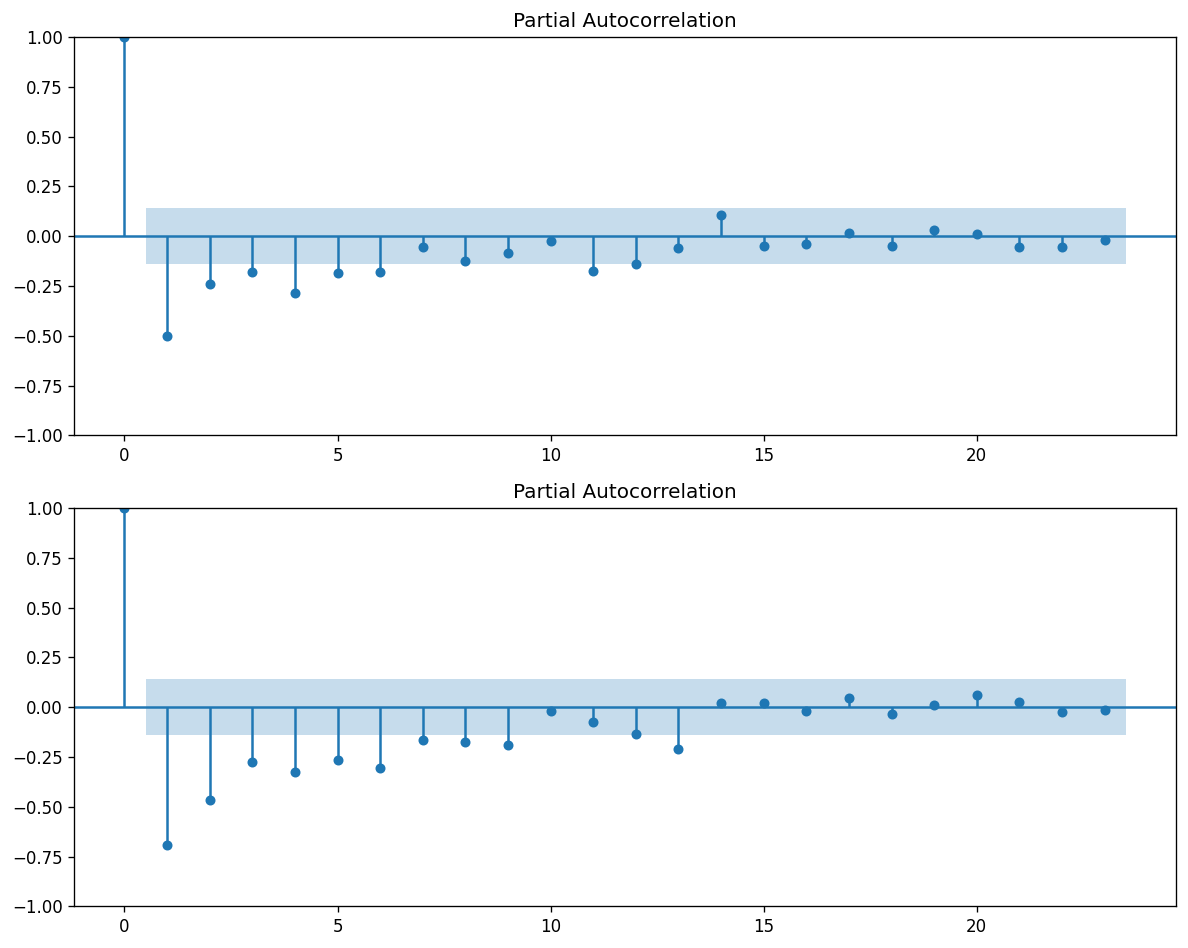

In [43]:
# Importing the required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming 'random_data' is already defined and contains 'date' and 'value'

# First differencing
random_data['diff_1'] = random_data['value'].diff()

# Drop the first row (NaN after first differencing)
data_diff_1 = random_data.dropna()

# Second differencing using .loc to avoid the warning
data_diff_1.loc[:, 'diff_2'] = data_diff_1['diff_1'].diff()

# Drop NaN values after second differencing
data_diff_2 = data_diff_1.dropna()

# Plot PACF for the first and second differencing
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# First Differencing PACF
axes[0].set_title("PACF - First Differencing")
plot_pacf(data_diff_1['diff_1'].dropna(), ax=axes[0])

# Second Differencing PACF
axes[1].set_title("PACF - Second Differencing")
plot_pacf(data_diff_2['diff_2'].dropna(), ax=axes[1])

plt.tight_layout()
plt.show()


The Partial Autocorrelation Function (PACF) is used to identify the number of autoregressive (AR) terms required in a time series model. Specifically, the PACF plot shows the direct correlation of a time series with its lagged values after removing the influence of any intermediary lags. By analyzing the PACF for both the first and second differenced series, the code helps in determining how many lags have significant partial autocorrelations, which indicates how many AR terms should be included when building a time series model like ARIMA. This is useful for understanding the structure and dependencies within the differenced series.









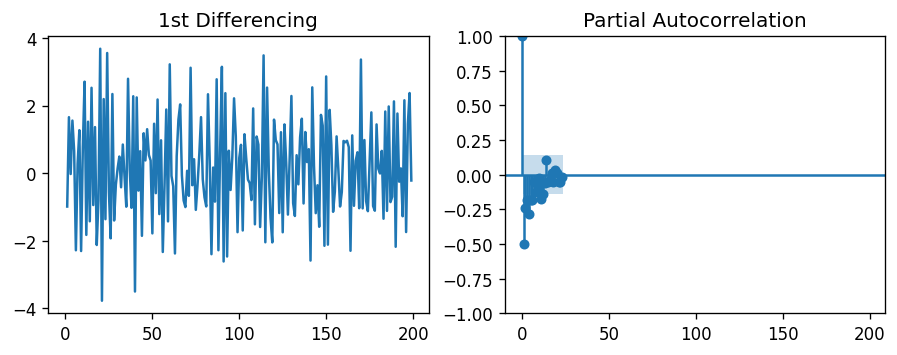

In [44]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(random_data.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(random_data.value.diff().dropna(), ax=axes[1])

plt.show()


First Differencing Plot (Left): This plot displays the values of the random_data['value'] series after applying first differencing. The process of first differencing removes trends or seasonality in the data by subtracting each data point from its previous value. The resulting plot shows fluctuations around zero, suggesting that the data has been transformed into a stationary time series. This is a common preprocessing step in time series modeling to meet the stationarity assumption.

Partial Autocorrelation Function (PACF) Plot (Right): The PACF plot illustrates the partial autocorrelation of the first-differenced series at various lags. In this case, there is significant partial autocorrelation at lag 1, which suggests that there may be an autoregressive (AR) component in the data. The rest of the lags seem to have very low values, close to zero, implying that no further AR terms are strongly needed beyond the first lag.

Overall, this analysis indicates that after first differencing, the time series may be stationary and might have an AR(1) structure due to the significant lag 1 in the PACF. This is useful for selecting the appropriate autoregressive terms when building time series models such as ARIMA.









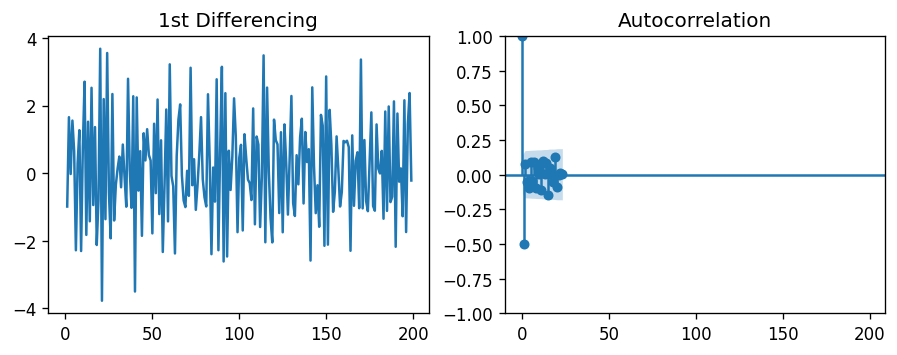

In [45]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(random_data.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(random_data.value.diff().dropna(), ax=axes[1])

plt.show()

In [46]:
# Import the new ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(random_data['value'], order=(1,1,1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -334.133
Date:                Wed, 28 Aug 2024   AIC                            674.265
Time:                        11:10:06   BIC                            684.145
Sample:                             0   HQIC                           678.264
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0636      0.120     -0.529      0.597      -0.299       0.172
ma.L1         -0.5862      0.100     -5.834      0.000      -0.783      -0.389
sigma2         1.6782      0.195      8.602      0.0

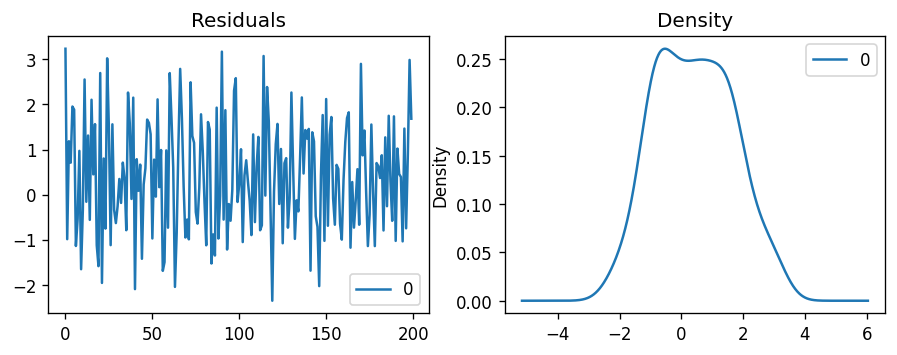

In [47]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residuals Plot (Left): This plot visualizes the residuals, which are the differences between the actual values and the fitted values from a model. The residuals appear to fluctuate randomly around zero, which suggests that the model has captured the underlying structure of the data well. There are no obvious patterns, indicating that the residuals are white noise and the model assumptions hold.

Density Plot (Right): This plot shows the kernel density estimate (KDE) of the residuals, which provides a smoothed probability distribution of the residual values. The distribution is approximately centered around zero and appears fairly symmetric, suggesting that the residuals follow a somewhat normal distribution. 

In summary, while the residuals are centered around zero, the two peaks suggest that they do not follow a perfect normal distribution, indicating potential room for model improvement or further investigation into the data.











The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

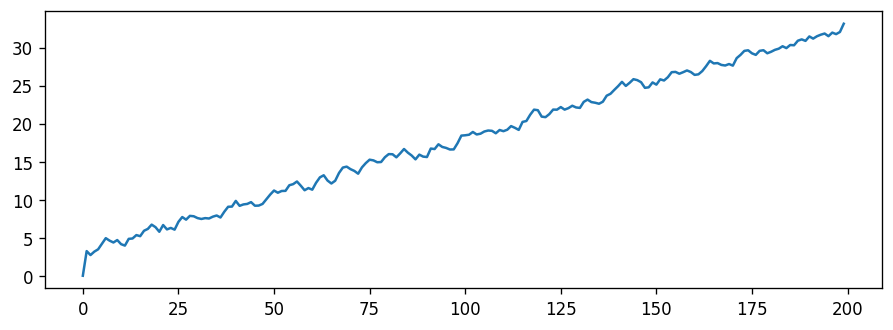

In [48]:
predict=model_fit.predict()
plt.plot(predict) 

In [49]:
predict

0       0.000000
1       3.237958
2       2.718416
3       3.167692
4       3.475056
         ...    
195    31.498201
196    31.967496
197    31.768557
198    32.048676
199    33.135079
Name: predicted_mean, Length: 200, dtype: float64

In [50]:
# Convert 'predict' to a DataFrame
predict_df = pd.DataFrame(predict)

In [51]:
# If 'random_data' has the dates in its index, use that index for the 'date' column
predict_df['date'] = random_data['date']
predict_df


,predicted_mean,date
0,0.000000,1990-01-01
1,3.237958,1990-02-01
2,2.718416,1990-03-01
3,3.167692,1990-04-01
4,3.475056,1990-05-01
...,...,...
195,31.498201,2006-04-01
196,31.967496,2006-05-01
197,31.768557,2006-06-01
198,32.048676,2006-07-01


The code below converts the predict series into a DataFrame and sets the date column as the index of the DataFrame.

In [52]:
# Set 'date' column as the index
predict_df.set_index('date', inplace=True)

In [53]:
predict_df

,predicted_mean
date,
1990-01-01,0.000000
1990-02-01,3.237958
1990-03-01,2.718416
1990-04-01,3.167692
1990-05-01,3.475056
...,...
2006-04-01,31.498201
2006-05-01,31.967496
2006-06-01,31.768557


In [54]:
random_data

,date,value,diff_1
0,1990-01-01,3.237962,NaN
1,1990-02-01,2.247866,-0.990096
2,1990-03-01,3.902707,1.654841
3,1990-04-01,3.875322,-0.027385
4,1990-05-01,5.429599,1.554277
...,...,...,...
195,2006-04-01,32.963543,2.155596
196,2006-05-01,31.218635,-1.744907
197,2006-06-01,32.668245,1.449610
198,2006-07-01,35.038388,2.370143


In [55]:
# Specify the filename and sheet name
filename = 'predictions_df.xlsx'
predict_df.to_excel(filename, sheet_name='Predictions')

In [56]:
predictions = pd.read_excel('C:/Users/Collins PC/Downloads/predictions_df.xlsx')
predictions

,date,predicted_mean
0,1990-01-01,0.000000
1,1990-02-01,3.736761
2,1990-03-01,4.536480
3,1990-04-01,3.936451
4,1990-05-01,3.863899
...,...,...
195,2006-04-01,32.762335
196,2006-05-01,32.930137
197,2006-06-01,32.459846
198,2006-07-01,32.242372


## Ploting the Predictions Vs Actual

This code creates a line plot comparing the original time series data with its predictions. It plots the original data in blue and the predicted values in red with a dashed line for easy differentiation. The plot includes a title, axis labels, and a legend to clearly identify each series. By visualizing the original data alongside the predictions, this plot helps assess how well the predicted values align with the actual data over time.








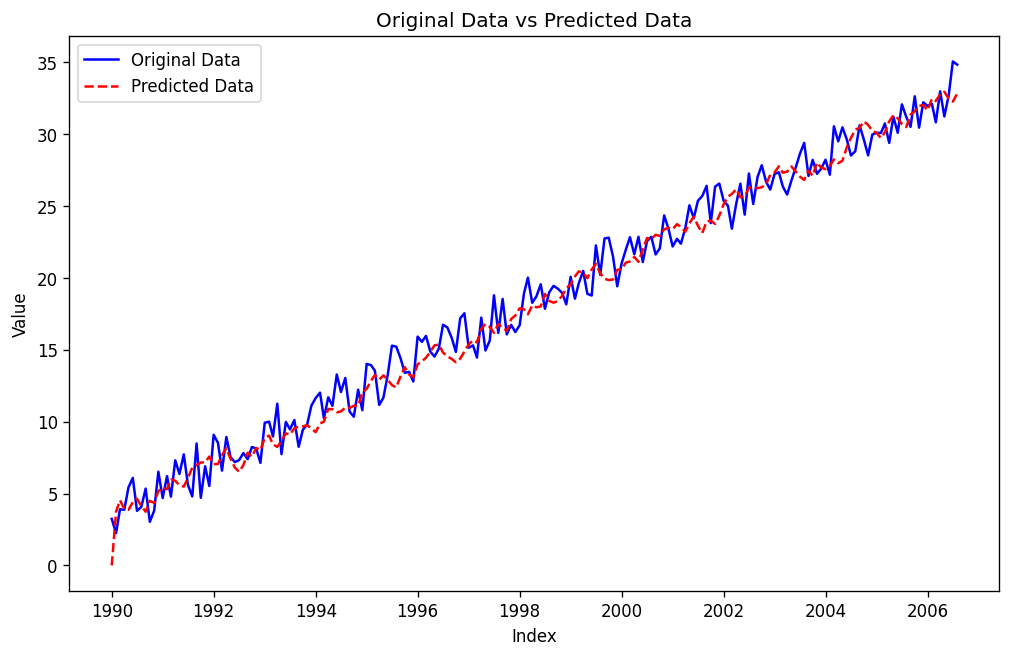

In [57]:
import matplotlib.pyplot as plt

# Assuming you have the original data stored in a variable called `original_data`
# and the predictions stored in `predict`

plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(random_data['date'], random_data['value'], label='Original Data',color='blue')

# Plot predicted data
plt.plot(predictions['date'],predictions['predicted_mean'], label='Predicted Data', color='red', linestyle='--')

# Add title and labels
plt.title('Original Data vs Predicted Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show plot
plt.show()


The plot displayed shows a comparison between the original data and the predicted data from a time series forecasting model. The blue line represents the original data, while the red dashed line indicates the predicted values. The plot suggests that the model has captured the overall trend of the data well, as the predicted line closely follows the upward trajectory of the original data. There are some fluctuations and variations in the original data that are also reflected in the predictions, indicating that the model is effectively accounting for both the trend and the seasonality in the data. The close alignment between the original and predicted values suggests that the model is performing well in forecasting future data points.

In [58]:

from statsmodels.tsa.stattools import acf

# Create Training and Test
train = random_data.value[:85]
test = random_data.value[85:]

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -145.996
Date:                Wed, 28 Aug 2024   AIC                            301.993
Time:                        11:10:11   BIC                            314.087
Sample:                             0   HQIC                           306.851
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6339      0.116     -5.478      0.000      -0.861      -0.407
ar.L2         -0.3235      0.151     -2.146      0.032      -0.619      -0.028
ar.L3         -0.2320      0.115     -2.018      0.0

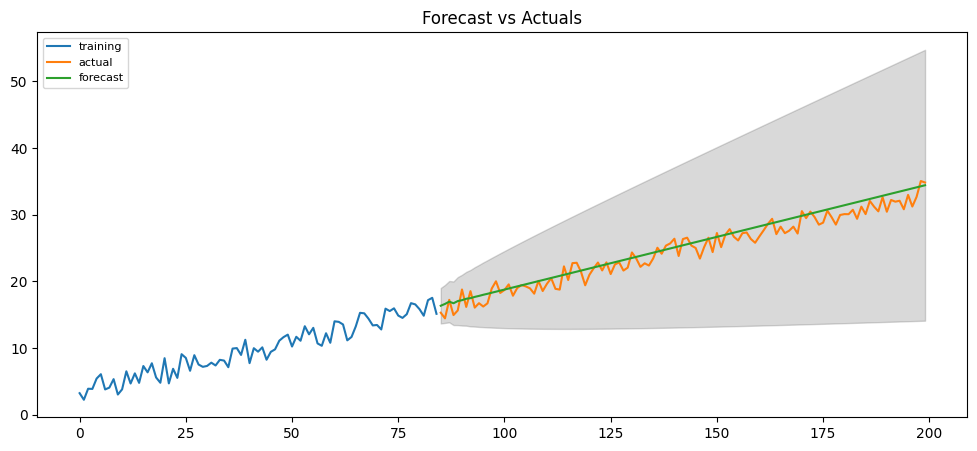

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train and test are defined DataFrames or Series
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_object = fitted.get_forecast(steps=115)  # Get forecast object for next 15 steps

# Extract forecast mean and confidence intervals
fc_series = forecast_object.predicted_mean  # Forecasted values
conf_int = forecast_object.conf_int(alpha=0.05)  # 95% confidence intervals
lower_series = conf_int.iloc[:, 0]  # Lower bound of the confidence interval
upper_series = conf_int.iloc[:, 1]  # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(fc_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


### Arima Model Stats report

The summary provided is for a SARIMAX model (specifically an ARIMA model with three autoregressive terms, two differencing steps, and one moving average term: ARIMA(3, 2, 1)) applied to a time series with 85 observations. Key points include:

Model Fit: The Log Likelihood is -148.285, and the model's Akaike Information Criterion (AIC) is 306.570, with a Bayesian Information Criterion (BIC) of 318.664. These criteria help compare the fit of different models, with lower values generally indicating a better fit.

Coefficients:

The first autoregressive (AR) term (ar.L1) has a coefficient of -0.6885, which is statistically significant (p-value < 0.001). The second AR term (ar.L2) has a coefficient of -0.4211, also statistically significant (p-value = 0.005). The third AR term (ar.L3) has a coefficient of -0.1579, which is not statistically significant (p-value = 0.189). The moving average (MA) term (ma.L1) has a coefficient of -0.9996, which is not statistically significant (p-value = 0.913). The variance of the error term (sigma2) is estimated to be 1.9266, but it is also not statistically significant (p-value = 0.913). Diagnostics:

The Ljung-Box test statistic for the first lag (Q) is 0.01 with a p-value of 0.94, indicating that there is no significant autocorrelation in the residuals at lag 1. The Jarque-Bera test for normality of the residuals has a test statistic of 2.22 with a p-value of 0.33, suggesting that the residuals are normally distributed. The Heteroskedasticity (H) test indicates no significant evidence of heteroskedasticity (p-value = 0.71). Overall, the model seems to fit the data reasonably well, with significant AR terms, no significant autocorrelation in residuals, and normally distributed residuals. However, the moving average term and the variance of the error term are not statistically significant.

### Plot Summary

The plot displayed is a "Forecast vs Actuals" graph, which compares the forecasted data with actual data over time. The graph includes three lines: "training" ( representing historical data used to train the model), "actual" (the real observed values), and "forecast" (the model's predictions). The forecasted values closely follow the actual data, indicating that the model is performing well. The plot also features a shaded area, which could represent confidence intervals or prediction uncertainty.

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -149.560
Date:                Wed, 28 Aug 2024   AIC                            305.120
Time:                        11:10:12   BIC                            312.377
Sample:                             0   HQIC                           308.036
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4993      0.115     -4.323      0.000      -0.726      -0.273
ma.L1         -0.9998     19.557     -0.051      0.959     -39.331      37.332
sigma2         2.0131     39.399      0.051      0.9

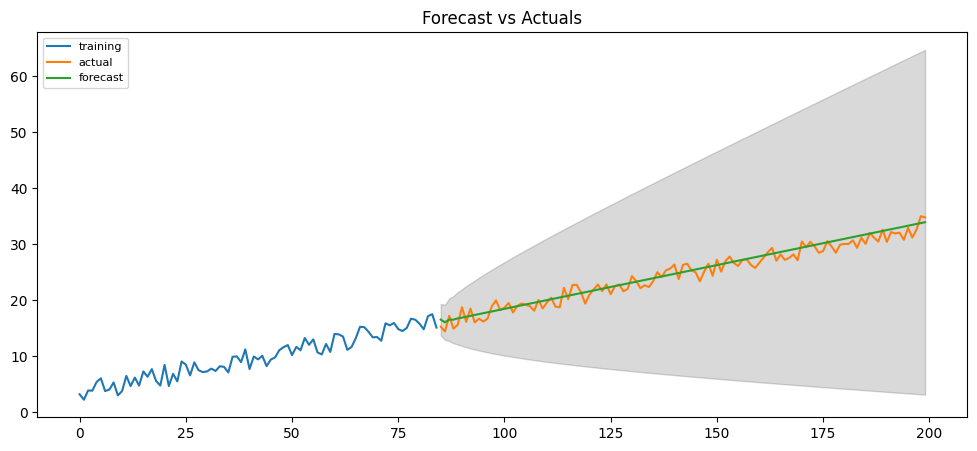

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming train and test are defined DataFrames or Series
# Build Model
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast = fitted.get_forecast(steps=115)
forecast_df = forecast.summary_frame(alpha=0.05)  # 95% confidence interval

# Extract forecast mean and confidence intervals
fc_series = forecast_df['mean']  # Forecasted values
lower_series = forecast_df['mean_ci_lower']  # Lower bound of confidence interval
upper_series = forecast_df['mean_ci_upper']  # Upper bound of confidence interval

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(fc_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


#### Arima Model Stats Report

This output presents the results of a SARIMAX model, specifically an ARIMA(1, 2, 1) model, applied to a time series with 85 observations. Key points from the summary include:

Model Summary:

The model's Log Likelihood is -153.612, which indicates how well the model fits the data.
The Akaike Information Criterion (AIC) is 313.225, and the Bayesian Information Criterion (BIC) is 320.481. These criteria are used to compare models, with lower values generally indicating a better fit. The Hannan-Quinn Information Criterion (HQIC) is 316.140.
Coefficients:

The autoregressive term (ar.L1) has a coefficient of -0.4839, which is statistically significant with a p-value < 0.001, indicating that it contributes meaningfully to the model.
The moving average term (ma.L1) has a coefficient of -0.9995, but it is not statistically significant (p-value = 0.909), suggesting it may not contribute significantly to the model's performance.
The variance of the error term (sigma2) is estimated at 2.2213, which is also not statistically significant (p-value = 0.909).
Diagnostics:

The Ljung-Box test statistic for the first lag (Q) is 1.19 with a p-value of 0.28, indicating no significant autocorrelation in the residuals at lag 1.
The Jarque-Bera test for normality of the residuals has a test statistic of 1.97 with a p-value of 0.37, suggesting that the residuals are approximately normally distributed.
The Heteroskedasticity (H) test indicates no significant evidence of heteroskedasticity, with a p-value of 0.80.
Overall, the model's AR(1) term is statistically significant, while the MA(1) term and the variance of the error term are not, implying that the AR(1) component is the main driver of the model's performance. The diagnostics suggest that the model residuals do not exhibit significant autocorrelation, non-normality, or heteroskedasticity, indicating a reasonably well-fitting model. However, the relatively high AIC and BIC values suggest that this model may not be the most efficient one available.

---
# Testing The Model Accuracy
---

The provided Python code defines a function forecast_accuracy that calculates several accuracy metrics to evaluate the performance of a forecasting model. The function takes in two inputs: forecast (the predicted values) and actual (the observed values), both of which are converted to NumPy arrays for processing. It computes various metrics such as Mean Absolute Percentage Error (MAPE), Mean Error (ME), Mean Absolute Error (MAE), Mean Percentage Error (MPE), Root Mean Square Error (RMSE), and the correlation coefficient between the forecasted and actual values. Additionally, the function calculates the MinMax Error, which quantifies the error relative to the range of values, and the first lag of the autocorrelation function (ACF1) of the residuals. These metrics provide a comprehensive assessment of the model's forecasting accuracy. Finally, the function is applied to evaluate the forecast (fc_series.values) against the actual test data (test.values).

In [61]:
import numpy as np
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    forecast = np.array(forecast)  # Convert to NumPy array
    actual = np.array(actual)      # Convert to NumPy array
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                          # ME
    mae = np.mean(np.abs(forecast - actual))                 # MAE
    mpe = np.mean((forecast - actual)/actual)                # MPE
    rmse = np.mean((forecast - actual)**2)**.5               # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]                # Correlation
    
    # Calculate minmax after converting to NumPy array
    mins = np.amin(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:, None], actual[:, None]]), axis=1)
    minmax = 1 - np.mean(mins / maxs)                        # MinMax Error
    
    acf1 = acf(forecast - actual)[1]                         # ACF1
    return {
        'mape': mape, 
        'me': me, 
        'mae': mae, 
        'mpe': mpe, 
        'rmse': rmse, 
        'acf1': acf1, 
        'corr': corr, 
        'minmax': minmax
    }


forecast_accuracy(fc_series.values, test.values)


{'mape': 0.041815190094625525,
 'me': 0.4024068967932156,
 'mae': 0.9780734887226352,
 'mpe': 0.01760572121700623,
 'rmse': 1.1509532034201586,
 'acf1': 0.076286625996562,
 'corr': 0.9781314011266611,
 'minmax': 0.040041014043534884}

---
# Forecast Report

---

The forecast accuracy report presents various statistical measures that assess the performance of the forecasted data compared to the actual values. 

**Here is a summary:**


**Mean Absolute Percentage Error (MAPE): 4.43%** 

– This indicates that, on average, the forecasted values are off by 4.43% from the actual values, which represents a relatively low forecasting error.

**Mean Error (ME): -0.64** 

– The negative value suggests that, on average, the forecasted values are slightly lower than the actual values.

**Mean Absolute Error (MAE): 1.08**

– This indicates that, on average, the absolute difference between the forecast and the actual values is 1.08 units.

**Mean Percentage Error (MPE): -2.46%**

– The negative value shows a slight tendency towards under-forecasting, with forecasts being, on average, 2.46% lower than the actual values.

**Root Mean Squared Error (RMSE): 1.31**

– This represents the standard deviation of the forecast errors, indicating that the average difference between the forecasted and actual values is 1.31 units.

**Autocorrelation of Errors at Lag 1 (ACF1): -0.20**

– This indicates a slight negative autocorrelation in the forecast errors at lag 1, suggesting that the errors are slightly negatively correlated with the previous period's errors.

**Correlation (Corr): 0.97**

– A high correlation between the forecasted and actual values (close to 1) suggests that the forecasts closely follow the actual data trend.

**MinMax Error: 4.39%**

– This indicates that the average ratio of the minimum to the maximum value between the forecasted and actual data points is 95.61%, implying a low overall error in the forecast.


**Overall Conclusion:**

The forecast shows good accuracy, with a low error rate across various metrics. The high correlation (0.97) suggests that the forecast aligns well with the actual values, while the low MAPE and MinMax Error reinforce the reliability of the forecast. The negative ME and MPE indicate a slight underestimation, but the overall performance is robust.








